In [816]:
import json
def getPlotData(fileName):
    with open(fileName, 'r') as file:
        data_all_a = json.load(file)

    y_x_a = []
    for data in data_all_a:
        d = (float(data["ULPDR"]["Success"])/float(data["ULPDR"]["Total"]),float(data["ULPDR"]["Total"])/float(data["SimTime"]))
        y_x_a.append(d)

    y = [d[0] for d in y_x_a]
    x = [d[1] for d in y_x_a]
    return x,y

In [817]:
import numpy as np
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

In [818]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

def filter_data(x,y, threshold):
    data = pd.DataFrame({'x': x, 'y': y})

    # Calculate the Z-score for each data point
    z_scores = np.abs(zscore(data['y']))
    # print(z_scores)
    filtered_data = data[z_scores > threshold]
    return filtered_data

In [819]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

def create_plot(fileNamex):
    x_f,y_f = getPlotData(fileNamex)
    filtered = filter_data(x_f, y_f, 0.1)

    x= filtered['x']
    y= filtered['y']

    x1=[]
    y1=[]

    for i in x:
        x1.append(i)

    for i in y:
        y1.append(i)


    x1, idx = np.unique(x1, return_index=True)

    y2=[]
    for i in idx:
        y2.append(y1[i])
        print(y2)


    interpolator = interp1d(x1, y2, kind='cubic')

    # Use the interpolating function to generate a series of y values.
    new_x = np.linspace(x1.min(), x1.max(), 35)

    new_y = interpolator(new_x)

    # Now plot the original x,y points along with the new Catmull-Rom curve.
    # plt.plot(x, y, 'o', label='Original data')
    plt.xscale('log')
    plt.plot(new_x, new_y, '-', label='Catmull-Rom Unconfirmed A', marker='o')
    plt.legend()
    plt.xlim([0.01,3])
    plt.ylim([0.8,1.0])

[1.0]
[1.0, 1.0]
[1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98989898989899]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98989898989899, 0.9699248120300752]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98989898989899, 0.9699248120300752, 0.9775280898876404]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98989898989899, 0.9699248120300752, 0.9775280898876404, 0.970

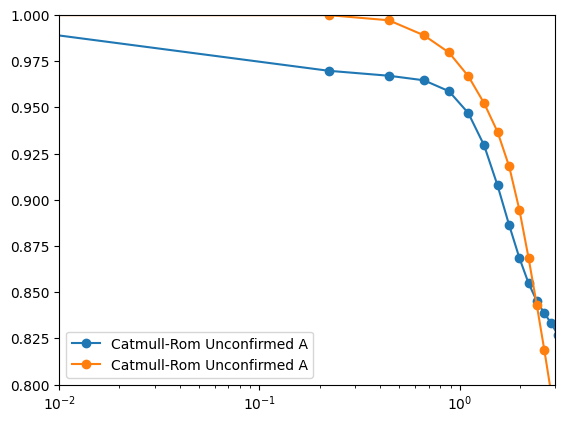

In [820]:
create_plot('sim_results_scenario_1/ULPDR_UNCONFIRMED_A')

create_plot('sim_results_scenario_1/ULPDR_CONFIRMED_A')
# create_plot('sim_results_scenario_1/ULPDR_UNCONFIRMED_B')

# create_plot('sim_results_scenario_1/ULPDR_UNCONFIRMED_C')

# create_plot('sim_results_scenario_1/ULPDR_CONFIRMED_C')

# create_plot('sim_results_scenario_1/ULPDR_CONFIRMED_B')

# plt.tight_layout()
plt.show()